# Canonical Representation of Block Matrix
## Marseille, June 14: Notebook for Lecture 3

In [1]:
#import Pkg; Pkg.add("Latexify")
using LinearAlgebra
using Latexify
using Distributions
using Plots, ColorSchemes

$n \times n$ correlation matrix, $C$, with $K\times K$ blocks. Block sizes are $n_k\times n_l $ and  $n_{1}+\cdots+n_{K}=n$.


$$ C=\left[\begin{array}{cccc}
C_{[1,1]} & C_{[1,2]} & \cdots & C_{[1,K]}\\
C_{[2,1]} & C_{[2,2]}\\
\vdots &  & \ddots\\
C_{[K,1]} &  &  & C_{[K,K]}
\end{array}\right]\in\mathbb{R}^{n\times n},
$$
and the diagonal blocks and off-diagonal blocks are given by
$$
C_{[k,k]} = 
    \left[
        \begin{array}{cccc}
            1 &  \rho_{k,k}& \cdots & \rho_{k,k}\\
            \rho_{k,k}  & 1 & \ddots & \vdots\\
            \vdots  & \ddots & \ddots & \rho_{k,k} \\
            \rho_{k,k}  & \cdots &\rho_{k,k}  & 1
        \end{array}
    \right]\in\mathbb{R}^{n_k\times n_k},
\quad 
C_{[k,l]} = 
    \left[
        \begin{array}{cccc}
            \rho_{k,l} & \rho_{k,l}&\cdots & \rho_{k,l}\\
            \rho_{k,l} & \rho_{k,l}& \ddots & \vdots \\
            \vdots & \ddots & \ddots & \rho_{k,l}\\
            \rho_{k,l} & \cdots & \rho_{k,l} & \rho_{k,l}
        \end{array}
    \right]\in\mathbb{R}^{n_k\times n_l} \qquad k,l=1,\ldots,K.
$$

## Canonical Representation of Block Matrices
$$
C = QDQ^{\prime},\qquad 
    D=\left[\begin{array}{cccc}
        A & 0 & \cdots & 0\\
0 & (1-\rho_{11})I_{n_{1}-1} & \ddots & \vdots\\
\vdots & \ddots & \ddots & 0\\
0 & \cdots & 0 & (1-\rho_{KK})I_{n_{K}-1}
\end{array}\right]$$
where 
$A$ is an $K\times K$ matrix, with elements

$$A_{kl}=\begin{cases}
\rho_{kk}(n_{k}-1)+ 1 & k=l,\\
\rho_{kl}\sqrt{n_{k}n_{l}} & i\neq j.
\end{cases}$$

The $Q$-matrix, $Q'Q=I$ does not depend on the correlation coefficients. Identical for all block matrices with the same block structure.

In [2]:
# Function that creates the Q-matrix for a Block Correlation matrix
function MakeQ(nK)   # nK is vector with block dimensions
    K = size(nK,1)   # number of blocks
    n = sum(nK)      # dimension of C matrix
    Q = zeros(n,n)
    i₀=0
    for k in 1:K
        nₖ = nK[k]
        v  = ones(nₖ,1)./ √nₖ
        Q[i₀+1:i₀+nₖ,k] = v
        if nₖ>1
            v⊥ = eigvecs(I(nₖ)-v*v')[:,2:end]
            Q[i₀+1:i₀+nₖ,K+i₀+1-(k-1):K+i₀+nₖ-1-(k-1)] = v⊥
        end
        i₀ = i₀ + nₖ
    end
    Q
end      

MakeQ (generic function with 1 method)

In [3]:
nK = [2,4,3,1]
Q = MakeQ(nK)
latexify(Q; fmt = "%.3g")

"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccc}\n0.707 & 0 & 0 & 0 & -0.707 & 0 & 0 & 0 & 0 & 0 \\\\\n0.707 & 0 & 0 & 0 & 0.707 & 0 & 0 & 0 & 0 & 0 \\\\\n0 & 0.5 & 0 & 0 & 0 & -0.38 & 0.723 & -0.289 & 0 & 0 \\\\\n0 & 0.5 & 0 & 0 & 0 & -0.436 & -0.691 & -0.289 & 0 & 0 \\\\\n0 & 0.5 " ⋯ 60 bytes ⋯ "0 & 0 & 0 & 0 & 0 & 0.866 & 0 & 0 \\\\\n0 & 0 & 0.577 & 0 & 0 & 0 & 0 & 0 & 0.707 & -0.408 \\\\\n0 & 0 & 0.577 & 0 & 0 & 0 & 0 & 0 & -0.707 & -0.408 \\\\\n0 & 0 & 0.577 & 0 & 0 & 0 & 0 & 0 & 0 & 0.816 \\\\\n0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [4]:
function MakeD(Cc,nK)
    K  = size(Cc,1)      # number of blocks
    n  = sum(nK)         # size of matrix
    D  = zeros(n,n)      #initialize
    Λₙ = Diagonal(sqrt.(nK))
    A  = Λₙ*Cc*Λₙ-Diagonal(diag(Cc .- 1)) 
    D[1:K,1:K] = A  #   
    idx = K
    for k in 1:K
        if nK[k] > 1
            for i = idx+1:idx+nK[k]-1
                D[i,i] = 1-Cc[k,k]
                idx +=1
            end
        end
    end
    return D
end

MakeD (generic function with 1 method)

In [5]:
# Fill Block matrix with random vars on [-1,1] (may not be psd)
using Random
Random.seed!(123);
K = size(nK,1)
Cc = 2*rand(K,K) .-1
for k=1:K-1, l=k+1:K
    Cc[k,l] = Cc[l,k]
end
latexify(Cc; fmt = "%.3g")

L"\begin{equation}
\left[
\begin{array}{cccc}
0.813 & -0.113 & 0.491 & 0.0242 \\
-0.113 & -0.332 & -0.145 & 0.735 \\
0.491 & -0.145 & 0.384 & -0.727 \\
0.0242 & 0.735 & -0.727 & 0.919 \\
\end{array}
\right]
\end{equation}
"

In [6]:
D = MakeD(Cc,nK)
latexify(D; fmt = "%.3g")

"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccc}\n1.81 & -0.32 & 1.2 & 0.0342 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n-0.32 & 0.00491 & -0.503 & 1.47 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n1.2 & -0.503 & 1.77 & -1.26 & 0 & 0 & 0 & 0 & 0 & 0 \\\\\n0.0342 & 1.47 & -1.26 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\\\" ⋯ 32 bytes ⋯ " 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 1.33 & 0 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 1.33 & 0 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 & 1.33 & 0 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.616 & 0 \\\\\n0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.616 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [7]:
C = Q*D*Q'
latexify(C; fmt = "%.3g")

"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccc}\n1 & 0.813 & -0.113 & -0.113 & -0.113 & -0.113 & 0.491 & 0.491 & 0.491 & 0.0242 \\\\\n0.813 & 1 & -0.113 & -0.113 & -0.113 & -0.113 & 0.491 & 0.491 & 0.491 & 0.0242 \\\\\n-0.113 & -0.113 & 1 & -0.332 & -0.332 & -0.332 & -0.145 &" ⋯ 376 bytes ⋯ "91 & -0.145 & -0.145 & -0.145 & -0.145 & 0.384 & 1 & 0.384 & -0.727 \\\\\n0.491 & 0.491 & -0.145 & -0.145 & -0.145 & -0.145 & 0.384 & 0.384 & 1 & -0.727 \\\\\n0.0242 & 0.0242 & 0.735 & 0.735 & 0.735 & 0.735 & -0.727 & -0.727 & -0.727 & 1 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [8]:
print("Smallest eigenvalue is: λmin = " ,eigmin(C),"      .....UPS!")

Smallest eigenvalue is: λmin = -1.170722907487592      .....UPS!

## Let's find a valid C and take (matrix) logarithm: log $G=\log(C)$.
First we need a valid $C$ (one without negative eigenvalues).

In [9]:
Random.seed!(12); # this one will generate a proper C
K = size(nK,1)
Cc = rand(K,K) .- 0.5
for k=1:K-1, l=k+1:K
    Cc[k,l] = Cc[l,k]
end
D = MakeD(Cc,nK)
C = Q*D*Q'
print("Smallest eigenvalue is = " , eigmin(C))

Smallest eigenvalue is = 0.014684833965074227

# Same Block Structure in log(C) (matrix logarithm)

In [10]:
latexify(real(log(C)); fmt = "%.2g")

"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccc}\n-0.77 & -0.64 & 0.51 & 0.51 & 0.51 & 0.51 & 0.67 & 0.67 & 0.67 & 0.51 \\\\\n-0.64 & -0.77 & 0.51 & 0.51 & 0.51 & 0.51 & 0.67 & 0.67 & 0.67 & 0.51 \\\\\n0.51 & 0.51 & -0.37 & 0.15 & 0.15 & 0.15 & -0.26 & -0.26 & -0.26 & -0.44 \\\\" ⋯ 307 bytes ⋯ "0.67 & 0.67 & -0.26 & -0.26 & -0.26 & -0.26 & -0.18 & -0.4 & -0.18 & -0.67 \\\\\n0.67 & 0.67 & -0.26 & -0.26 & -0.26 & -0.26 & -0.18 & -0.18 & -0.4 & -0.67 \\\\\n0.51 & 0.51 & -0.44 & -0.44 & -0.44 & -0.44 & -0.67 & -0.67 & -0.67 & -0.66 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

## Using Contraction Algorithm will work

Create a block matrix with $\gamma$ element, leaving its diagonal to be determined.

Here is a block matrix $G[0]$. 

In [11]:
G = real(log(C))
[G[i,i] = 0 for i = 1:size(G,1)]
latexify(G; fmt = "%.3g")

"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccc}\n0 & -0.639 & 0.514 & 0.514 & 0.514 & 0.514 & 0.671 & 0.671 & 0.671 & 0.508 \\\\\n-0.639 & 0 & 0.514 & 0.514 & 0.514 & 0.514 & 0.671 & 0.671 & 0.671 & 0.508 \\\\\n0.514 & 0.514 & 0 & 0.155 & 0.155 & 0.155 & -0.264 & -0.264 & -0." ⋯ 360 bytes ⋯ "0.264 & -0.264 & -0.264 & -0.264 & -0.181 & 0 & -0.181 & -0.666 \\\\\n0.671 & 0.671 & -0.264 & -0.264 & -0.264 & -0.264 & -0.181 & -0.181 & 0 & -0.666 \\\\\n0.508 & 0.508 & -0.437 & -0.437 & -0.437 & -0.437 & -0.666 & -0.666 & -0.666 & 0 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

Let's determine $x$ such that $G[x]$ is a correlation matrix.

In [12]:
function GFTstep!(G,Δx)   # the "!" is important for speed. So is "." in code below. Modifying memory
    Δx .= log.(diag(exp(G)))
    for i∈1:length(Δx)
        G[i,i] -= Δx[i]   # update diagonal elements
    end
end
function GFT(G, ϵ::Float64 = 1e-12)
    n = size(G,1)
    δ = Inf; N = -1; Δx = ones(n,1)   # initialize
    while δ > sqrt(n)*ϵ
        GFTstep!(G,Δx)                # GFTstep updated diagonal of A, the
        δ = norm(Δx)                  # convergence is defined by δ
        N = N + 1
    end
    return Symmetric(exp(G)), N
end
C,N = GFT(G)
C

10×10 Symmetric{Float64, Matrix{Float64}}:
  1.0        0.125279   0.350311  …   0.301272   0.301272  -0.181649
  0.125279   1.0        0.350311      0.301272   0.301272  -0.181649
  0.350311   0.350311   1.0          -0.024546  -0.024546  -0.286277
  0.350311   0.350311   0.407512     -0.024546  -0.024546  -0.286277
  0.350311   0.350311   0.407512     -0.024546  -0.024546  -0.286277
  0.350311   0.350311   0.407512  …  -0.024546  -0.024546  -0.286277
  0.301272   0.301272  -0.024546      0.193246   0.193246  -0.346991
  0.301272   0.301272  -0.024546      1.0        0.193246  -0.346991
  0.301272   0.301272  -0.024546      0.193246   1.0       -0.346991
 -0.181649  -0.181649  -0.286277     -0.346991  -0.346991   1.0

## Generating block-C from arbitrary block-G

In [13]:
function MakeBlockG(Gc,nK)  # Gc = compact form of G
    K = size(nK,1)
    v_nK = vcat(0,cumsum(nK))
    n = v_nK[end]
    G = zeros(n,n)
    for k in 1:K
        i₁ = v_nK[k]+1
        i₂ = v_nK[k+1]
        G[i₁:i₂,i₁:i₂] .= Gc[k,k]
        for l in k+1:K
            j₁ = v_nK[l]+1
            j₂ = v_nK[l+1]
            G[i₁:i₂,j₁:j₂] .= Gc[k,l]         
            G[j₁:j₂,i₁:i₂] .= Gc[k,l]       
        end
    end
    G[diagind(G)] .= 0
    G
end
Random.seed!(12)
X = randn(K,K)
M = X'X./K
nK = [ 3,3,1,2]
G = MakeBlockG(M,nK)
latexify(G; fmt = "%.2f")

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccc}\n0.00 & 1.39 & 1.39 & -0.36 & -0.36 & -0.36 & 0.37 & 0.67 & 0.67 \\\\\n1.39 & 0.00 & 1.39 & -0.36 & -0.36 & -0.36 & 0.37 & 0.67 & 0.67 \\\\\n1.39 & 1.39 & 0.00 & -0.36 & -0.36 & -0.36 & 0.37 & 0.67 & 0.67 \\\\\n-0.36 & -0.36 & -0.36" ⋯ 159 bytes ⋯ "00 & -0.10 & -0.64 & -0.64 \\\\\n0.37 & 0.37 & 0.37 & -0.10 & -0.10 & -0.10 & 0.00 & -0.21 & -0.21 \\\\\n0.67 & 0.67 & 0.67 & -0.64 & -0.64 & -0.64 & -0.21 & 0.00 & 0.85 \\\\\n0.67 & 0.67 & 0.67 & -0.64 & -0.64 & -0.64 & -0.21 & 0.85 & 0.00 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [14]:
C,N = GFT(G)
print("N = ", N)
latexify(C; fmt = "%.02f")

N = 48

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccc}\n1.00 & 0.99 & 0.99 & -0.91 & -0.91 & -0.91 & 0.46 & 0.94 & 0.94 \\\\\n0.99 & 1.00 & 0.99 & -0.91 & -0.91 & -0.91 & 0.46 & 0.94 & 0.94 \\\\\n0.99 & 0.99 & 1.00 & -0.91 & -0.91 & -0.91 & 0.46 & 0.94 & 0.94 \\\\\n-0.91 & -0.91 & -0.91" ⋯ 155 bytes ⋯ "& 1.00 & -0.33 & -0.94 & -0.94 \\\\\n0.46 & 0.46 & 0.46 & -0.33 & -0.33 & -0.33 & 1.00 & 0.28 & 0.28 \\\\\n0.94 & 0.94 & 0.94 & -0.94 & -0.94 & -0.94 & 0.28 & 1.00 & 0.97 \\\\\n0.94 & 0.94 & 0.94 & -0.94 & -0.94 & -0.94 & 0.28 & 0.97 & 1.00 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [15]:
print("After applying contraction-step $(N) times") 

After applying contraction-step 48 times

In [16]:
Random.seed!(12)
X = randn(K,K)
M = X'X./K^2
nK = [ 3,3,1,2]
G = MakeBlockG(M,nK)
C,N = GFT(G)
print("After applying contraction-step $(N) times") 
latexify(C; fmt = "%.02f")

After applying contraction-step 9 times

"\\begin{equation}\n\\left[\n\\begin{array}{ccccccccc}\n1.00 & 0.43 & 0.43 & -0.19 & -0.19 & -0.19 & 0.12 & 0.27 & 0.27 \\\\\n0.43 & 1.00 & 0.43 & -0.19 & -0.19 & -0.19 & 0.12 & 0.27 & 0.27 \\\\\n0.43 & 0.43 & 1.00 & -0.19 & -0.19 & -0.19 & 0.12 & 0.27 & 0.27 \\\\\n-0.19 & -0.19 & -0.19" ⋯ 159 bytes ⋯ "00 & -0.04 & -0.25 & -0.25 \\\\\n0.12 & 0.12 & 0.12 & -0.04 & -0.04 & -0.04 & 1.00 & -0.02 & -0.02 \\\\\n0.27 & 0.27 & 0.27 & -0.25 & -0.25 & -0.25 & -0.02 & 1.00 & 0.30 \\\\\n0.27 & 0.27 & 0.27 & -0.25 & -0.25 & -0.25 & -0.02 & 0.30 & 1.00 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

## Try a bigger one

In [17]:
nK = [ 5, 6, 7, 8, 9, 11, 12, 13, 14, 15 ]
nK = vcat(nK,nK,nK,nK,nK)
nK = vcat(nK,nK)
n  = sum(nK)
K  = size(nK,1)
Random.seed!(123)               # save for later
Gc = 1.2*randn(K,K)
Gc = (Gc'Gc .+ 0.1)./n          # Symmetric random KxK matrix for block construction
Gc₀, nK₀ = Gc, nK
G = MakeBlockG(Gc₀, nK₀)
C,N = GFT(G)
C
#latexify(C; fmt = "%.02f")

1000×1000 Symmetric{Float64, Matrix{Float64}}:
  1.0          0.485983     0.485983    …  0.205672    0.205672    0.205672
  0.485983     1.0          0.485983       0.205672    0.205672    0.205672
  0.485983     0.485983     1.0            0.205672    0.205672    0.205672
  0.485983     0.485983     0.485983       0.205672    0.205672    0.205672
  0.485983     0.485983     0.485983       0.205672    0.205672    0.205672
 -0.00726225  -0.00726225  -0.00726225  …  0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225  …  0.00703358  0.00703358  0.00703358
  0.0519809    0.0519809    0.0519809      0.0399518   0.0399518   0.0399518
  0.0519809    0.0519809    

In [18]:
N, eigmin(C), minimum(C), maximum(C-I(n))

(21, 0.23142723130701942, -0.4511258480766694, 0.7685727686933737)

# More Efficiently done with Canonical Form for $G=\log(C)$
$G=\log(C)$ has the same block structure, with diagonal blocks
$$
G_{[k,k]} = 
    \left[
        \begin{array}{cccc}
            y_k &  \gamma_{k,k}& \cdots & \gamma_{k,k}\\
            \gamma_{k,k}  & y_k & \ddots & \vdots\\
            \vdots  & \ddots & \ddots & \gamma_{k,k} \\
            \gamma_{k,k}  & \cdots &\gamma_{k,k}  & y_k
        \end{array}
    \right]\in\mathbb{R}^{n_k\times n_k},
$$

where $y_k$, $k=1,\ldots,K$ denotes the unique diagonal elements of $G$

$$ \mathrm{diag}(G) = (y_1,\ldots,y_1,\ldots,y_K,\ldots,y_K)^\prime.$$ 

Thus, $G$ has canonical form 

$$G=\log(C) = Q\tilde{D}Q^{\prime},\qquad 
    \tilde{D}=\left[\begin{array}{cccc}
        \tilde{A}(y) & 0 & \cdots & 0\\
0 & (y_1-\gamma_{11})I_{n_{1}-1} & \ddots & \vdots\\
\vdots & \ddots & \ddots & 0\\
0 & \cdots & 0 & (y_K-\gamma_{KK})I_{n_{K}-1}
\end{array}\right]$$

where $\tilde{A}$ is a $K\times K$ matrix, with elements

$$\tilde{A}(y)_{kl}=\begin{cases}
\gamma_{kk}(n_{k}-1)+ y_k & k=l,\\
\gamma_{kl}\sqrt{n_{k}n_{l}} & i\neq j.
\end{cases}$$

## Idea: From $\tilde{A}$, solve for $y$

We can solve for $x^\ast$, such that $\exp G[x^\ast]$ is a correlation matrix using contraction steps. 

We known that
$$ x^\ast = (y^\ast_1,\ldots,y^\ast_1,\ldots,y^\ast_K,\ldots,y^\ast_K)^\prime,$$ where $y^\ast_1,\ldots,y^\ast_K,$ are 
repeated $n_1,\ldots,n_K$ times, respectively.

If we initialize with a vector with the same structure

$$ x^{(0)} = (y^{(0)}_1,\ldots,y^{(0)}_1,\ldots,y^{(0)}_K,\ldots,y^{(0)}_K)^\prime$$

We can undertake the exact same steps using matrices of smaller dimensions, $K\times K$ instead of $n\times n$. 

Because, the $k$-th diagonal block of $\exp G[x]$ is given by
$$
[\exp(\tilde{A}(y))]_{k,k} P_{n_k} + e^{y_{k}-\gamma_{kk}}(I-P_{n_k}),\qquad
P_{n_k}  = \left[\begin{array}{ccc}
            \tfrac{1}{n_{k}}&  \cdots & \tfrac{1}{n_{k}}\\
            \vdots  & \ddots & \vdots \\
            \tfrac{1}{n_{k}}  & \cdots & \tfrac{1}{n_{k}}
        \end{array}\right],
$$

such that we need 
$$
1= \frac{[\exp(\tilde{A}(y))]_{k,k}}{n_k} + e^{y_{k}-\gamma_{kk}}(\frac{n_k-1}{n_k}),
$$

and the contraction steps (in GFT algorithm) are identical to 

$$
y_k^{(n+1)} = y_k^{(n)} 
          - \log \left(\frac{[\exp(\tilde{A}(y^{(n)}))]_{k,k}}{n_k} + e^{y^{(n)}_{k}-\gamma_{kk}}(\frac{n_k-1}{n_k})\right).
$$

Notice that 
$$\tilde{A}(y) = \tilde{A}^0 + \mathrm{diag}(y),\qquad \text{where}\quad 
\tilde{A}^0_{kl} =\begin{cases}
\gamma_{kk}(n_{k}-1) & k=l,\\
\gamma_{kl}\sqrt{n_{k}n_{l}} & i\neq j.
\end{cases} $$

## Generate Random [Block] Correlation Matrices

In [23]:
# generates the block correlation matrix from gammas (in Gc) using block sizes in nK
# in: Gc  -- KxK symmetric matrix, with G_kl = G_lk = γ_kl
#     nK  -- Kx1 vector with integers defining block sizes
#     tol -- (optional) tolerance   
function Gamma2BlockC(Gc,nK,tol::Float64 = 1e-12)
    Gc = Symmetric(Gc)
    K  = size(Gc,1)      # number of blocks
    n  = sum(nK)         # size of matrix
    Λₙ = Diagonal(sqrt.(nK))
    Ã  = Symmetric(Λₙ*Gc*Λₙ-Diagonal(diag(Gc)))  # This is A-tilde
    y  = zeros(K)
    Δy = ones(K) 
    while sum(abs.(Δy))>tol
        Δy .= real(log.(diag(exp(Ã))./nK .+ (1.0 .- 1.0./nK).*exp.(y-diag(Gc))) )
        y -= Δy
        for k = 1:K
            Ã[k,k] -= Δy[k]   # update diagonal elements
        end
    end 
    D  = zeros(n,n)                    # Create D matrix for C
    D[1:K,1:K] = exp(Ã)      
        idx = K
    for k in 1:K
        if nK[k] > 1
            dₖ = exp(y[k]-Gc[k,k])
            for i = idx+1:idx+nK[k]-1
                D[i,i] = dₖ
                idx +=1
            end
        end
    end
    Q = MakeQ(nK)
    Symmetric(Q*D*Q')
end    

Gamma2BlockC (generic function with 2 methods)

In [24]:
#import Pkg; Pkg.add("BenchmarkTools")
using BenchmarkTools
# The New Way to do it
@btime Gamma2BlockC(Gc₀, nK₀)

  41.550 ms (2494 allocations: 42.82 MiB)


1000×1000 Symmetric{Float64, Matrix{Float64}}:
  1.0          0.485983     0.485983    …  0.205672    0.205672    0.205672
  0.485983     1.0          0.485983       0.205672    0.205672    0.205672
  0.485983     0.485983     1.0            0.205672    0.205672    0.205672
  0.485983     0.485983     0.485983       0.205672    0.205672    0.205672
  0.485983     0.485983     0.485983       0.205672    0.205672    0.205672
 -0.00726225  -0.00726225  -0.00726225  …  0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225  …  0.00703358  0.00703358  0.00703358
  0.0519809    0.0519809    0.0519809      0.0399518   0.0399518   0.0399518
  0.0519809    0.0519809    

How much faster?

In [25]:
function Gamma2BlockC_old(Gc, nK)
    G = MakeBlockG(Gc, nK)
    C,N = GFT(G)
    return C
end

Gamma2BlockC_old (generic function with 1 method)

In [26]:
# The Old Way
@btime Gamma2BlockC_old(Gc₀, nK₀)

  7.555 s (536 allocations: 1.04 GiB)


1000×1000 Symmetric{Float64, Matrix{Float64}}:
  1.0          0.485983     0.485983    …  0.205672    0.205672    0.205672
  0.485983     1.0          0.485983       0.205672    0.205672    0.205672
  0.485983     0.485983     1.0            0.205672    0.205672    0.205672
  0.485983     0.485983     0.485983       0.205672    0.205672    0.205672
  0.485983     0.485983     0.485983       0.205672    0.205672    0.205672
 -0.00726225  -0.00726225  -0.00726225  …  0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225     0.00703358  0.00703358  0.00703358
 -0.00726225  -0.00726225  -0.00726225  …  0.00703358  0.00703358  0.00703358
  0.0519809    0.0519809    0.0519809      0.0399518   0.0399518   0.0399518
  0.0519809    0.0519809    

## This is about ~175x faster and ~30x less memory in this example

In [27]:
#Do they give the same solution?
maximum(abs.(Gamma2BlockC_old(Gc₀, nK₀).-Gamma2BlockC(Gc₀, nK₀)))

1.6711076966657856e-12

In [32]:
K = 6
Gc = randn(K,K) .+ 0.6
for k=1:K-1, l=k+1:K
    Gc[k,l] = Gc[l,k]
end
#nK = [k for k = 1:K]
nK = rand(Poisson(4),K) .+ 1
print("n = ",sum(nK),"     nK = ",nK,"\n")
Gc = (Gc ./ sqrt(sum(nK)))./2
C = Gamma2BlockC(Gc,nK)
println("λmin = ",eigmin(C))
latexify(C; fmt = "%.2g")

n = 30     nK = [4, 3, 6, 4, 3, 10]
λmin = 0.1593312483564942


"\\begin{equation}\n\\left[\n\\begin{array}{cccccccccccccccccccccccccccccc}\n1 & 0.1 & 0.1 & 0.1 & 0.15 & 0.15 & 0.15 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.1 & 0.17 & 0.17 & 0.17 & 0.17 & 0.2 & 0.2 & 0.2 & 0.14 & 0.14 & 0.14 & 0.14 & 0.14 & 0.14 & 0.14 & 0.14 & 0.14 & 0.14 \\\\\n0.1 " ⋯ 5933 bytes ⋯ "4 & 0.44 & 1 & 0.44 \\\\\n0.14 & 0.14 & 0.14 & 0.14 & 0.36 & 0.36 & 0.36 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.25 & 0.091 & 0.091 & 0.091 & 0.091 & 0.43 & 0.43 & 0.43 & 0.44 & 0.44 & 0.44 & 0.44 & 0.44 & 0.44 & 0.44 & 0.44 & 0.44 & 1 \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

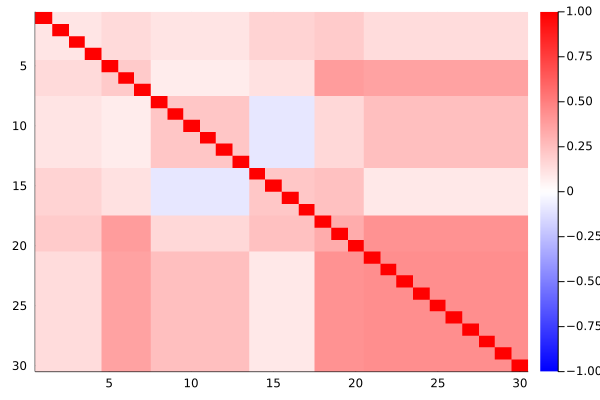

In [33]:
heatmap(C,  c = :bwr, clims=(-1,1), yflip=:true)